In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



Загрузіть цей файл. Перевірте розмір таблиці, наявність пропусків, тип стовпців.  

In [ ]:
from google.colab import files



uploaded = files.upload()


file_name = "shopping_trends.csv"


data = pd.read_csv(file_name, encoding='cp1251')


Saving shopping_trends.csv to shopping_trends (2).csv


In [ ]:

print("Table Size:", data.shape)
print("\nMissing Values:\n", data.isnull().sum())
print("\nColumn Types:\n", data.dtypes)


Table Size: (3900, 19)

Missing Values:
 Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Column Types:
 Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object


Далі рекомендовано використовувати наступні стовпці (з огляду на тип даних) "Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases".  

In [ ]:
selected_columns = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]


Застосуйте алгоритм K-means для кластеризації даних:

Для цього потрібно виконати:

I.Підготовка даних:

Виберіть вищезазначені числові стовпці і створіть новий DataFrame, який буде містити лише ці стовпці. Рекомендовано перейменувати стовпці (з маленької букви, пробіл замінити підкресленням).

Проведіть масштабування даних, щоб всі числові ознаки мали однаковий масштаб (можна використовувати будь-який метод).

In [ ]:
selected_data = data[selected_columns]


selected_data.columns = selected_data.columns.str.replace(' ', '_').str.lower()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

scaled_df = pd.DataFrame(scaled_data, columns=selected_data.columns)


print("Scaled Data:")
print(scaled_df.head())

Scaled Data:
        age  purchase_amount_(usd)  review_rating  previous_purchases
0  0.718913              -0.285629      -0.907584           -0.785831
1 -1.648629               0.178852      -0.907584           -1.616552
2  0.390088               0.558882      -0.907584           -0.162789
3 -1.517099               1.276716      -0.349027            1.637107
4  0.061263              -0.454531      -1.466141            0.391025


II. Визначення кількості кластерів:

Використайте метод ліктя, щоб визначити оптимальну кількість кластерів. Цей метод вимагає повторної кластеризації даних для різної кількості кластерів і обчислення вартості кластерів. Вартість кластерів зазвичай обчислюється за допомогою суми квадратів відстаней між точками і центроїдами кластерів.

Побудуйте графік вартості кластерів відносно кількості кластерів і виберіть "ліктьову точку", де спостерігається різке зменшення вартості кластерів. Це і буде оптимальною кількістю кластерів.

Кластеризація за допомогою K-means:

Використовуйте оптимальну кількість кластерів, визначену на попередньому кроці, для запуску алгоритму K-means.

Розділіть дані на кластери і призначте кожному об'єкту ідентифікатор кластера. III. Візуалізація результатів:

Якщо ви хочете візуалізувати дані, які мають більше двох ознак, ви можете використовувати метод головних компонентів (PCA) для зменшення розмірності даних і подальшої візуалізації. PCA допоможе вам зменшити кількість ознак до 2 або 3, щоб побудувати графіки.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

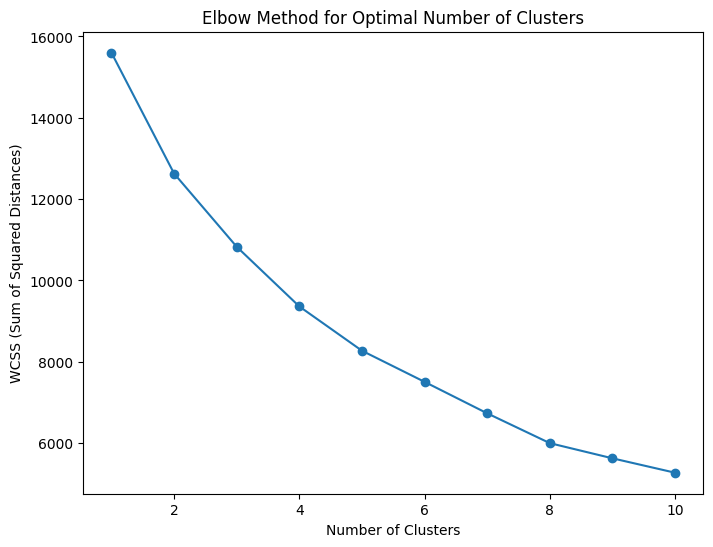

In [ ]:
def calculate_wcss(data, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

wcss_values = calculate_wcss(scaled_data)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(wcss_values) + 1), wcss_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Sum of Squared Distances)')
plt.show()